In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/coooodek/requestLog/refs/heads/main/raw_data/requestLog.csv')
df

,기술검토번호,요청일,제품그룹,Location,담당자
0,ME25-636,2025-11-18 16:26,A,국내,김*민
1,ME25-635,2025-11-18 14:39,B,국내,김*민
2,ME25-634,2025-11-18 8:23,C,국내,노*경
3,ME25-633,2025-11-17 17:44,D,국내,박*호
4,ME25-632,2025-11-17 16:57,E,국내,김*민
...,...,...,...,...,...
4579,ME19-005,2019-01-08 12:48,E,국내,유*훈
4580,ME19-004,2019-01-08 10:16,I,국내,김*민
4581,ME19-003,2019-01-04 13:56,C,국내,이*영
4582,ME19-002,2019-01-04 13:48,M,국내,이*호


In [ ]:
# 요청일 컬럼 타입 변경 필요

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기술검토번호    4584 non-null   object
 1   요청일       4584 non-null   object
 2   제품그룹      4584 non-null   object
 3   Location  4584 non-null   object
 4   담당자       4584 non-null   object
dtypes: object(5)
memory usage: 179.2+ KB


In [6]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import matplotlib
import seaborn

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [9]:
df2 = df[['기술검토번호','요청일','제품그룹']].copy()

In [10]:
# 요청일 칼럼 타입 변경

df2['요청일'] = pd.to_datetime(df2['요청일'])

In [ ]:
# 연도 칼럼 생성 = df2['연도']

df2['연도'] = df2['요청일'].dt.year

In [82]:
# 분기 칼럼 생성 = df2['분기']

# df2['분기'] = df2['요청일'].dt.month.map(lambda x : f'{(x-1)//3+1}')
df2['분기'] = df2['요청일'].dt.quarter

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기술검토번호  4584 non-null   object        
 1   요청일     4584 non-null   datetime64[ns]
 2   제품그룹    4584 non-null   object        
 3   연도      4584 non-null   int32         
 4   분기      4584 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 143.4+ KB


In [ ]:
# 연도 / 제품그룹별 접수 내역을 피봇테이블로

df2_pivot = df2.pivot_table(index = df2['연도'], columns = '제품그룹', aggfunc = 'size', fill_value = 0)
df2_pivot

제품그룹,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
연도,,,,,,,,,,,,,,,,,,,,,
2019,5,23,34,25,104,9,71,9,164,18,...,45,21,0,8,0,0,3,54,5,3
2020,2,27,33,40,98,12,57,9,113,39,...,48,18,1,6,2,0,6,59,0,1
2021,3,22,49,52,112,9,48,9,91,36,...,51,18,1,3,0,1,6,52,1,1
2022,10,30,28,42,96,15,82,6,102,31,...,62,8,0,1,0,1,15,45,4,0
2023,16,33,29,40,134,8,82,4,150,30,...,56,22,0,6,0,0,14,44,0,0
2024,12,18,30,45,110,28,57,20,156,21,...,44,15,0,2,1,0,14,0,0,0
2025,23,27,34,33,122,27,60,7,122,11,...,42,11,2,5,3,1,3,0,0,0


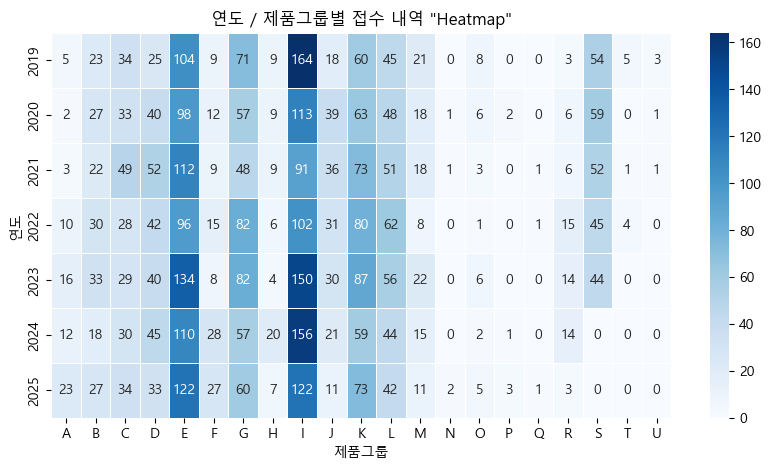

In [ ]:
# 시각화로 접수 건수 확인하기

plt.figure(figsize=(10, 5))
sns.heatmap(df2_pivot, annot=True, fmt='d', cmap='Blues', linewidths = 0.5)
plt.title('연도 / 제품그룹별 접수 내역 "Heatmap"')
plt.show()

In [ ]:
# 연도 / 분기 / 제품그룹 Grouping

df_q = (
    df2.groupby(['연도', '분기', '제품그룹']).size().reset_index(name = '접수')
)

In [145]:
df_q

,연도,분기,제품그룹,접수
0,2019,1,A,2
1,2019,1,B,5
2,2019,1,C,9
3,2019,1,D,5
4,2019,1,E,31
...,...,...,...,...
426,2025,4,G,6
427,2025,4,I,16
428,2025,4,J,2
429,2025,4,K,4


In [146]:
df2_pivot2 = df_q.pivot_table(index = '분기', columns = '제품그룹', values = '접수').fillna(0)
df2_pivot2

제품그룹,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
분기,,,,,,,,,,,,,,,,,,,,,
1,2.800000,6.142857,8.428571,10.714286,31.428571,4.285714,17.571429,1.5,31.142857,6.714286,...,13.714286,6.428571,1.0,2.00,1.0,0.0,3.00,11.4,1.0,0.0
2,5.500000,7.714286,11.571429,10.857143,30.142857,3.285714,15.714286,3.5,39.714286,6.428571,...,13.142857,4.000000,0.0,2.20,1.5,1.0,3.25,15.4,2.0,1.0
3,2.833333,6.571429,7.714286,10.571429,23.000000,4.714286,17.571429,2.6,29.714286,6.000000,...,12.000000,3.714286,2.0,1.00,0.0,1.0,3.40,13.6,1.0,1.0
4,3.000000,5.285714,6.142857,7.428571,26.285714,3.142857,14.428571,4.2,27.714286,7.428571,...,10.857143,2.800000,1.0,1.25,1.0,0.0,2.00,10.4,1.0,2.0


In [71]:
df.isnull().sum()

기술검토번호      0
요청일         0
제품그룹        0
Location    0
담당자         0
dtype: int64

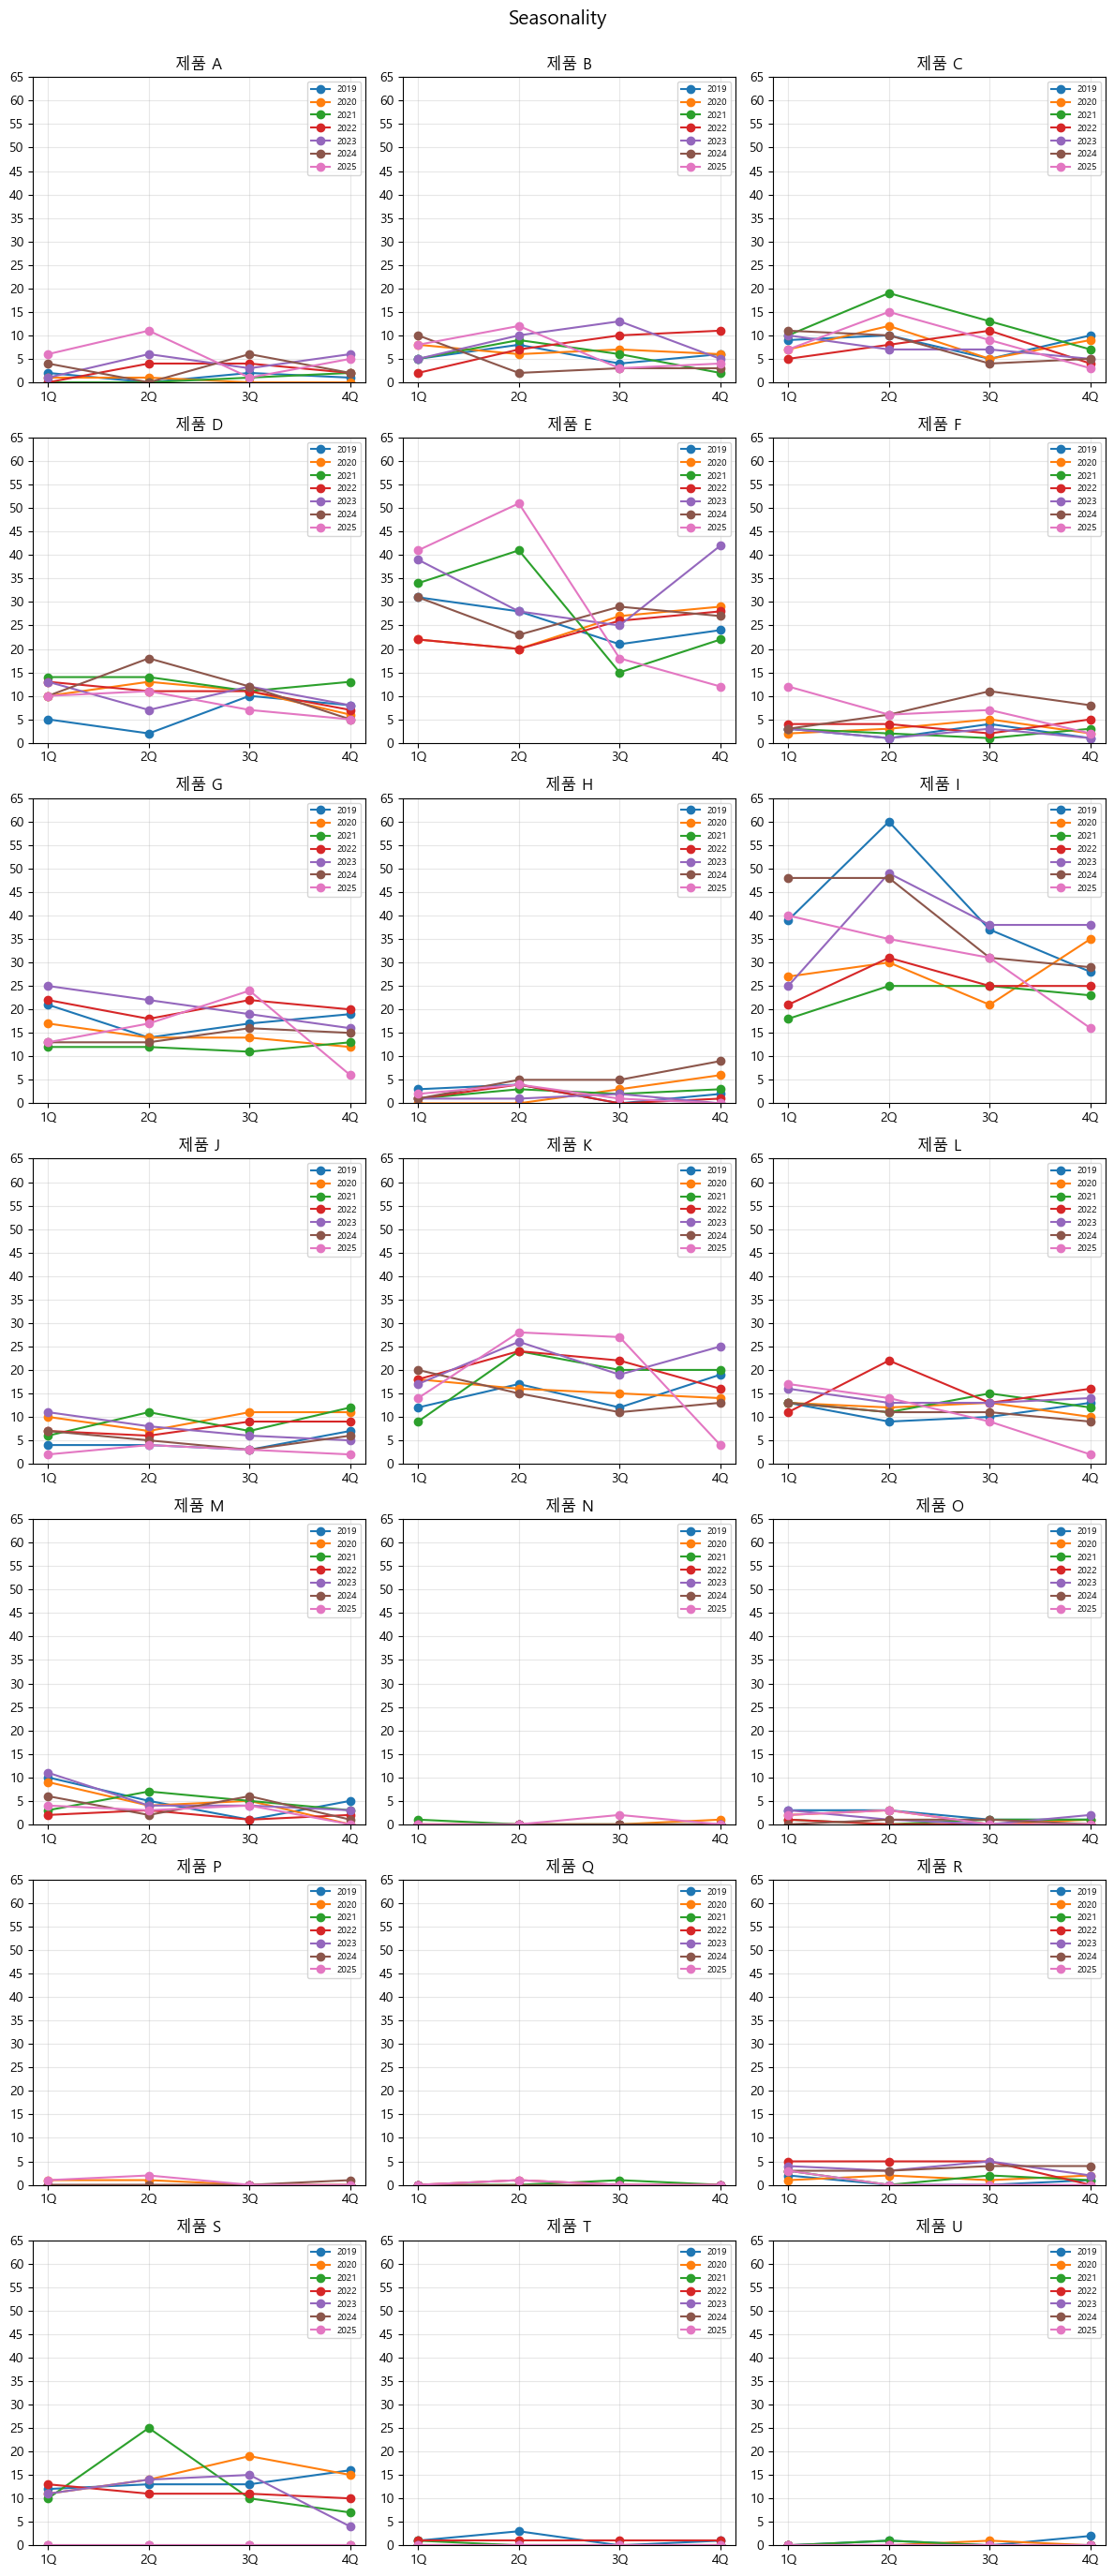

In [ ]:
products = sorted(df_q['제품그룹'].unique())
years = sorted(df_q['연도'].unique())

rows = 7
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

ymax = df_q['접수'].max() # y축

# --------------------------------------------------------------------------- #

for i, p in enumerate(products):
    ax = axes[i]
    
    df_p = df_q[df_q['제품그룹'] == p]
    
    for y in years:
        d = df_p[df_p['연도'] == y].set_index('분기')['접수']
        d = d.reindex([1, 2, 3, 4], fill_value=0)
        
        ax.plot(d.index, d.values, marker='o', label=f'{y}')
    
    ax.set_title(f'제품 {p}')
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['1Q','2Q','3Q','4Q'])
    ax.set_ylim(0, ymax)
    ax.set_yticks(range(0, 70, 5)) # [0,70) & 간격 5
    ax.grid(alpha=0.3)
    ax.legend(fontsize = 7)


fig.suptitle('Seasonality', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.show()

### 주요 인사이트
1. 매년 I & E 항목이 가장 많이 접수 된다.
2. I 항목의 접수 건수는 작년 대비 21퍼센트 가량 줄었다.
3. S항목은 2019~2023년도에 꾸준히 접수 되었었는데, 작년과 올해 기록이 없다. 분류가 변경 되었거나 제품 판매가 중단되었을 가능성이 있다.
4. 너무 적게 접수 되는 항목은 개별 분류할 필요가 없을 거 같다.

### 전처리 시 해야할 것
1. 중복 접수 건 drop (요청일 시:분:초 다 동일함으로 구분)
2. 연도, 분기 컬럼 생성
3. 제품그룹2를 만들어서 일정 퍼센티지 이하로 접수된 품목은 "기타" 항목으로 분류